# A Numerical Approach to Solve Ordinary Differential equation (ODE)

Differential equation is perhaps one such mathematical entity which we maximum encounter in any branch of science and technology and without solving it we can not get insight of the system. That is why a robust knowledge of solving differential equation is very much desireable and hence, it is included in the curriculum of undergraduate syllabus of any science discipline. Analytical method of solving differential equation is quite straight forward. But it too fail to crack the problem if it is of complex nature. 

In that case, numerical technique plays a signifivant role which can solve the problem in its own way. That is why along with the technique of analytical methodlogy theknowledge of numerical technique of solving differential equation is highly desired.

In this section, a few numerical technique will be discussed. The most simple, may be the first stepping stone in the pursuit of solving differential equation is the Euler's method.

Consider the following ODE
\begin{align}
\frac{dy}{dx}=\frac{y+x}{y-x},\hspace{0.5cm}y(0)=1
\end{align}
Let us find the value $y$ at $x=0.6$, taking the step size = 0.2.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

So, first of all discretize the domain of independent variable either by `arange` or `linspace` function of `NumPy`.

In [50]:
# Discretizing the independent variable 'x'
x_init, x_final, step_size = 0, 0.6, 0.2
x = np.arange(x_init, x_final+step_size, step_size)

Next, we have to create arrays for storing the values of dependent variable. Since, we are trying to visualize the difference between different methods of solving differential equation, we have to create array for each method.

In [51]:
# Create array for dependent variable 'y'
y = np.zeros(len(x))          # array for Euler method
y_mod = np.zeros(len(x))      # array for Modified Euler method
y_rk2 = np.zeros(len(x))      # array for RK2 method
y_rk4 = np.zeros(len(x))      # array for RK4 method
y_odeint = np.zeros(len(x))   # array for odeint method

# Initialize your variables
y[0]     = 1
y_mod[0] = 1
y_rk2[0] = 1
y_rk4[0] = 1
y_odeint[0] = 1

Next, we have to define a few helper functions. Since, the most essential part of solving differential equation is to estimate the value of slope at the desired point/points, so, we have to define a function which we may call `model`. So, the `model` function in our problem is given by

In [52]:
f = lambda y, x: (y+x)/(y-x)  #Slope function

def model(y, x):
    slope = f(y, x)           # f(x,y) may be repleced by appropriate value according to the problem
    return slope

In the above representation of function definition, one may simply stick to `model` function. The additional `f` function for better clarity, keeping in mind a new learner.

Consider, the differential equation
$$\frac{dy}{dx}=f(x,y(x))$$

The idea of solving a differential equation numerically is to evaluate any future value of the dependent variable $y$ with the known value of independnt varibale $x$, known value of slope, and step-size of the interval, i.e.
$$\text{y_new} = y + \text{slope}\times \text{step-size}$$

Suppose, the value of the dependent variable $y_i$ is known at $x_i$ and we want to know the corresponding value at $x_{i+1}$ which is at a distance $h$ apart from $x_i$, then,
$$y_{i+1}=y_i + \frac{dy}{dx}\Bigr|_{(x_i,y_i)}\cdot h$$

where, $\frac{dy}{dx}\Bigr|_{(x_i,y_i)}=f(x_i, y(x_i))$ is known at the point $(x_i, y_i)$. But, the accuracy of the method lies in the value of step-size (h). So, we can define a function `eulerFunc` for evaluating the values of dependent variable $y$ corresponding to the values of dependent variable $x$.

<img src="eulerpic01.png" width=300 /> 

In [53]:
def eulerFunc(y, x, h):
    y_new = y + model(y, x)*h
    return y_new

The success of Euler's method which depends heavily on small stepsize ($h$) may amount to long time of evalaution. This limitation may, however, be overcome by evaluating the slopes of the function at $x_i$ and  $x_{i+1}$, and then taking an average of both for calculating the future value at $x_{i+1}$. This is implemented with the following function.

<img src="eulerModpic01.png" width=300 /> 

In [54]:
def eulerModFunc(y, x, h):
    k1 = model(y, x)            # slope at (x, y)
    y_p = y + k1*h              # predicted 'y' value at 'x+h' based on 'k1'
    k2 = model(y_p, x+h)        # slope at (x+h, y+h)
    k_avg = (k1+k2)/2           # average of the slopes at 'k1' and 'k2'
    y_c = y + k_avg*h           # corrected 'y' value at 'x+h' based on 'k_avg'
    return y_c

Runge Kutta method of second order follows an intermediate path between previous two methods. Here, we first evaluate slope $k_1$ at $x_i$ and then $k_2$ at $x_{i+\frac{h}{2}}$ with the slope value $k_1$ evaluated at $x_i$. This slope $k_2$ is used to evaluate $y_{i+1}$. We define following function for its implementation.

<img src="rk2pic.png" width=300 /> 

In [55]:
def rk2Func(y, x, h):
    k1 = model(y, x)
    k2 = model(y+k1*h/2, x+h/2)
    y_new = y + k2*h
    return y_new

In the Runge Kutta method of order four, average of slope values evaluated at four different points within the interval $(x_i, x_{i+1})$ is used to calculate $y_{i+1}$ with the known values of $y_i$ at $x_i$.

<img src="rk4pic.png" width=400 /> 

In [56]:
def rk4Func(y, x, h):
    k1 = model(y, x)
    k2 = model(y+k1*h/2, x+h/2)
    k3 = model(y+k2*h/2, x+h/2)
    k4 = model(y+k3*h, x+h)
    k_avg = (k1+2*(k2+k3)+k4)/6
    y_new = y + k_avg*h
    return y_new

In [57]:
# Calculate 'y' values by Euler's method, Modified Euler's method, RK2 and RK4 methods
h = step_size
for i in range(len(x)-1):
    y[i+1]     = eulerFunc(y[i], x[i], h)
    y_mod[i+1] = eulerModFunc(y_mod[i], x[i], h)
    y_rk2[i+1] = rk2Func(y_rk2[i], x[i], h)
    y_rk4[i+1] = rk4Func(y_rk2[i], x[i], h)
x, y, y_mod, y_rk2, y_rk4

(array([0. , 0.2, 0.4, 0.6]),
 array([1.        , 1.2       , 1.48      , 1.82814815]),
 array([1.        , 1.24      , 1.55008688, 1.91272733]),
 array([1.        , 1.24      , 1.55126961, 1.91510223]),
 array([1.        , 1.23923542, 1.54961688, 1.91355796]))

Besides the above mentioned numerical methods, where writing a few lines of coding is required on the part of the user, there is a function called `odeint` under `SciPy` package which can directly solve a differential equation.

In [62]:
from scipy.integrate import odeint
y0 = y[0]
sol = odeint(model, y0, x)
y_odeint = sol[:, 0]
y_odeint

array([1.        , 1.23923039, 1.54891242, 1.91148762])

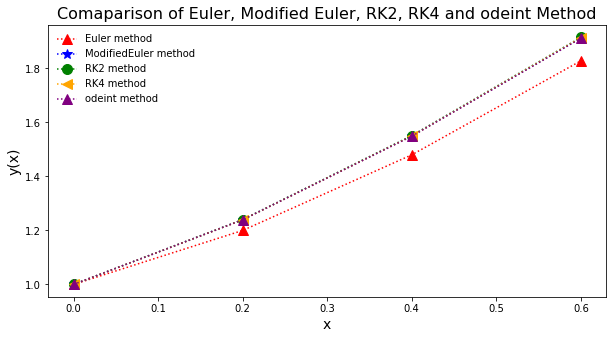

In [67]:
plt.figure(figsize=(10,5))
plt.plot(x, y, ls = ':', marker='^', markersize=10, color='red', label='Euler method')
plt.plot(x, y_mod, ls = ':', marker='*', markersize=10,  color='blue', label='ModifiedEuler method')
plt.plot(x, y_rk2, ls = ':', marker='o', markersize=10, color='green', label='RK2 method')
plt.plot(x, y_rk4, ls = ':', marker='<', markersize=10, color='orange', label='RK4 method')
plt.plot(x, y_odeint, ls = ':', marker='^', markersize=10, color='purple', label='odeint method')
plt.xlabel('x', fontsize=14)
plt.ylabel('y(x)', fontsize=14)
plt.title('Comaparison of Euler, Modified Euler, RK2, RK4 and odeint Method', fontsize=16)
plt.legend(frameon=False, loc='best')
plt.show()

So, what we see from the above representation that except basic Euler's method, all other methods are equivalent and one may use any one of them.